### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ - MongoDB

In [3]:
from pymongo import MongoClient
# ÎÑ§Ìä∏ÏõåÌÅ¨ Ïó∞Í≤∞ Í∑úÏπô : protocol://ip:port/path 
client = MongoClient('mongodb://192.168.0.50:27017/')

db = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]

In [ ]:
getDatafromDB = collection.find()


data = list(getDatafromDB)


In [16]:
import pandas as pd

In [17]:
dfData = pd.DataFrame(data)

In [ ]:
dfData.info()

In [ ]:
dfData.describe(include="all")

In [ ]:
dfDataEdited = dfData.drop(labels='_id',axis=1)
dfDataEdited

In [ ]:
dataToDicOnlyCommentAndDate = dfDataEdited[['COMMENT', 'DATE']].to_dict(orient="list")
dataToDicOnlyCommentAndDate
type(dataToDicOnlyCommentAndDate)

In [ ]:
commentDatasList = dfDataEdited.groupby('DATE')['COMMENT'].apply(list).to_dict()
commentDatasList
type(commentDatasList)

In [ ]:
dateList = dataToDicOnlyCommentAndDate['DATE']
commentList = dataToDicOnlyCommentAndDate['COMMENT']
# dateList

In [35]:
tossComments = {}
for date, comment in zip(dateList, commentList):
    if date in tossComments:
        tossComments[date].append(comment)
    else:
        tossComments[date] = [comment]

In [39]:
specificDate = "2024-12-04"
commentsForDate = tossComments.get(specificDate, [])
commentsForDate

['Í≥ÑÏóÑ Ïã§Ìå® ÎÑàÎ¨¥ ÏïÑÏâ¨Ïö¥ ÏÇ¨Îûå Í∞úÏ∂î üëçüëçüëç',
 '2024-12-04\n\nÏïàÎÖïÌïòÏÑ∏Ïöî Ï°¥Î≤ÑÍøÄÏò§ÏÜåÎ¶¨ÏûÖÎãàÎã§.! ÌîÑÎ¶¨Ïû• ÏãúÏûë Ï†Ñ\nÏ∞∏Í≥†ÌïòÏã§ÎßåÌïú ÎØ∏Ïû• Ïù¥Ïäà Ï†ïÎ¶¨Ìï¥ÎìúÎ¶ΩÎãàÎã§!üçØ\n\nüìåÎâ¥ÏöïÏ¶ùÏãú 3ÎåÄÏßÄÏàò ÌòºÏ°∞ ÎßàÍ∞ê. JOLTs Íµ¨Ïù∏Í±¥Ïàò ÏòàÏÉÅÏπò ÏÉÅÌöåÏóê Îî∞Î•∏ Í≤ΩÍ∏∞ ÎÇôÍ¥ÄÎ°† ÏÜç Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò/IT Ï§ëÏã¨ Í∞ïÏÑ∏ Î∞è Ïú†Ìã∏Î¶¨Ìã∞/Í∏àÏúµ Ï§ëÏã¨ ÏïΩÏÑ∏\n\nüìåWTI, OPEC+ Ï¶ùÏÇ∞ Ïó∞Í∏∞ Í∞ÄÎä•ÏÑ± ÏÉÅÏäπ Î∞è Ïù¥Ïä§ÎùºÏóò-Ìó§Ï¶àÎ≥ºÎùº Ï∂©Îèå ÏßÄÏÜçÏóê ÏÉÅÏäπ ÎßàÍ∞ê. NDF Ïõê/Îã¨Îü¨ ÌôòÏú® Í∞ÑÎ∞§ 1,430ÏõêÍπåÏßÄ Í∏âÎì±ÌñàÏúºÎÇò Îã§Ïãú 1,414ÏõêÏúºÎ°ú ÏïàÏ†ï\n\nüìåÎØ∏ Íµ≠Ï±ÑÍ∏àÎ¶¨, Ïó∞Ï§Ä Ï£ºÏöî Ïù∏ÏÇ¨Îì§Ïùò ÏõêÎ°†Ï†ÅÏù∏ ÏûÖÏû• Ïû¨ÌôïÏù∏ Î∞è ÌîÑÎûëÏä§, ÎåÄÌïúÎØºÍµ≠Ïùò Ï†ïÏπòÏ†Å Î∂àÏïàÏóê Îî∞Î•∏ ÏïàÏ†ÑÏûêÏÇ∞ ÏÑ†Ìò∏ Í∞ïÌôî ÏÜç Íµ¨Í∞ÑÎ≥Ñ ÌòºÏ°∞ ÎßàÍ∞ê. Ïª§Î∏å Ïä§Ìã∞ÌîÑÎãù. 10y2y Í∏àÎ¶¨Ï∞®Îäî 3.4bp ÌôïÎåÄÎêú 4.4bp\n\nüë®üèª\u200dü¶≥ ÎØ∏Íµ≠Ï¶ùÏãú\n-DOW 44,705.53p (-0.17%)\n-NASDAQ 19,480.91p (+0.40%)\n-S&P500 6,049.88p (+0.05%)\n-Russell 2000 2,416.35p (-0.73

In [41]:
from datetime import datetime, timedelta

def get_week_number_from_base(date_str, base_date="2024-01-01"):
    # Í∏∞Ï§ÄÏùº(2024-01-01)Í≥º ÏûÖÎ†•Îêú ÎÇ†ÏßúÎ•º datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
    date = datetime.strptime(date_str, '%Y-%m-%d')
    base = datetime.strptime(base_date, '%Y-%m-%d')
    
    # Îëê ÎÇ†Ïßú ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Î•º Ï£º Îã®ÏúÑÎ°ú Í≥ÑÏÇ∞
    diff = date - base
    week_number = diff.days // 7
    
    # Ï£ºÏ∞® ÏãúÏûëÏùºÍ≥º Ï¢ÖÎ£åÏùº Í≥ÑÏÇ∞
    week_start = base + timedelta(weeks=week_number)
    week_end = week_start + timedelta(days=6)
    
    return {
        'week_number': week_number,
        'date_range': f"{week_start.strftime('%Y-%m-%d')} ~ {week_end.strftime('%Y-%m-%d')}"
    }

# Ï£ºÏ∞®Î≥ÑÎ°ú ÏΩîÎ©òÌä∏Î•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
weeklyComments = {}

# ÎÇ†ÏßúÏôÄ ÏΩîÎ©òÌä∏Î•º Ï£ºÏ∞®Î≥ÑÎ°ú Ï†ïÎ¶¨
for date, comment in zip(dateList, commentList):
    week_info = get_week_number_from_base(date)
    week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
    
    if week_key in weeklyComments:
        weeklyComments[week_key].append(comment)
    else:
        weeklyComments[week_key] = [comment]

# ÌäπÏ†ï ÎÇ†ÏßúÏùò Ï£ºÏ∞® ÏΩîÎ©òÌä∏ Í∞ÄÏ†∏Ïò§Í∏∞
specificDate = "2024-02-15"
week_info = get_week_number_from_base(specificDate)
week_key = f"Week {week_info['week_number']}: {week_info['date_range']}"
commentsForWeek = weeklyComments.get(week_key, [])


In [51]:
type(weeklyComments)
weeklyComments.keys()
testComments = weeklyComments['Week 46: 2024-11-18 ~ 2024-11-24']
type(testComments)

list

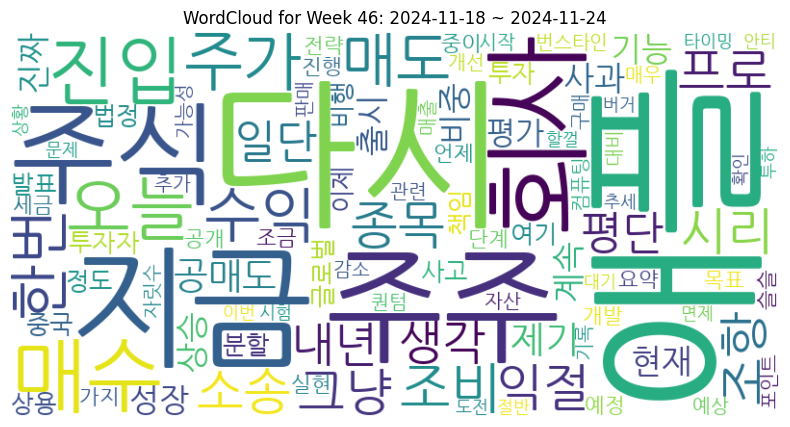

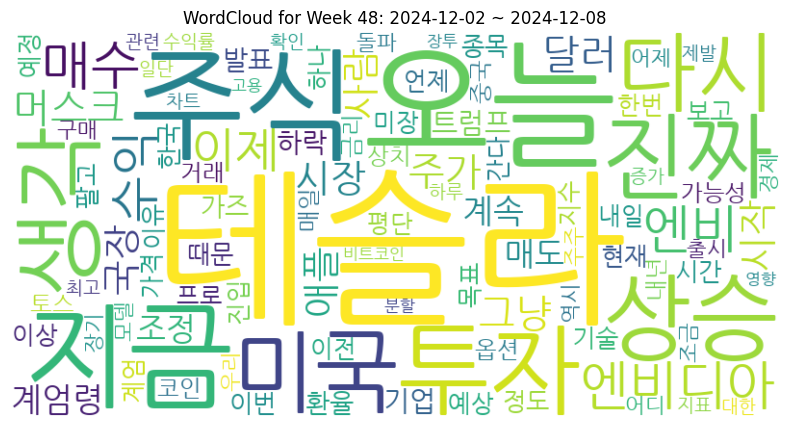

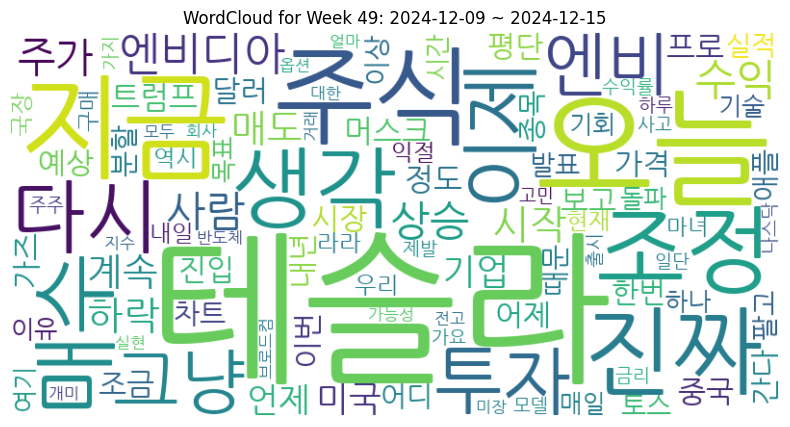

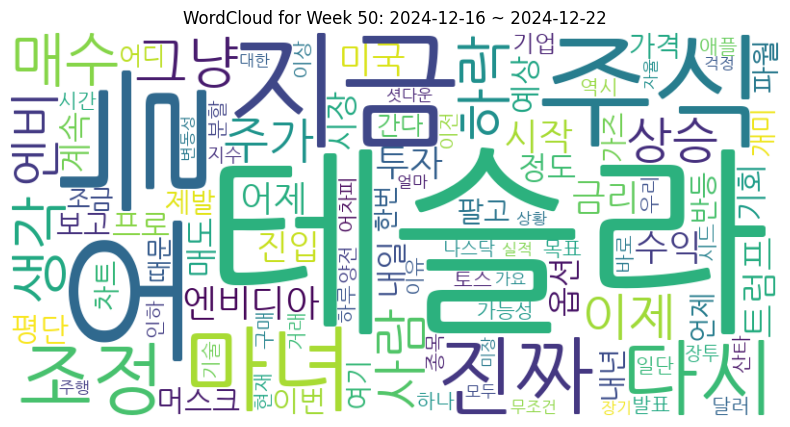

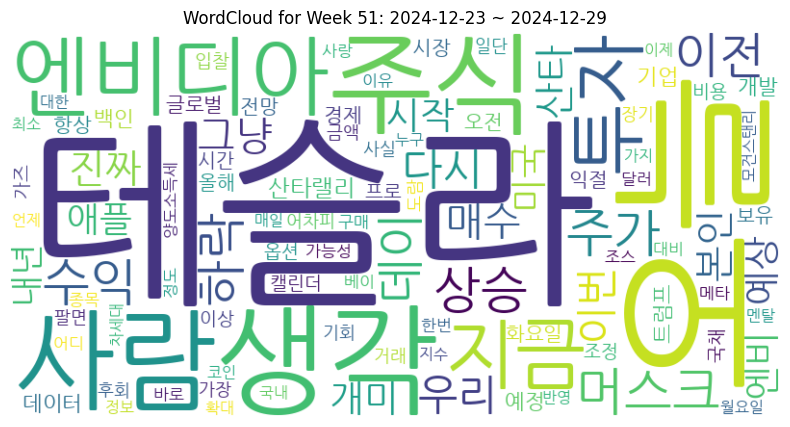

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from konlpy.tag import Okt  # ÌïúÍ∏Ä ÌòïÌÉúÏÜå Î∂ÑÏÑùÍ∏∞
import re

def create_weekly_wordcloud(comments, title):
    # ÌÖçÏä§Ìä∏ Ï†ÑÏ≤òÎ¶¨
    okt = Okt()
    
    # Î™®Îì† ÏΩîÎ©òÌä∏Î•º ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Ìï©ÏπòÍ∏∞
    text = ' '.join(comments)
    
    # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞(Îòê Îã§Î•∏ Î∂àÏö©Ïñ¥ Ïó¨Í∏∞Ïóê)
    text = re.sub(r'[^\w\s]', '', text)
    
    # ÌòïÌÉúÏÜå Î∂ÑÏÑù (Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú)
    nouns = okt.nouns(text)
    
    # ÌïúÍ∏ÄÏûê Îã®Ïñ¥ Ï†úÍ±∞
    nouns = [noun for noun in nouns if len(noun) > 1]
    
    # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
    wordcloud = WordCloud(
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(Counter(nouns))
    
    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Í∞Å Ï£ºÏ∞®Î≥ÑÎ°ú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
for week_key, comments in weeklyComments.items():
    create_weekly_wordcloud(comments, f'WordCloud for {week_key}')
